# Background

## Goal

Say you want to advertise to nearby residents for this grocery store: https://freshmadisonmarket.com/.  You want to create a map like this to identify these potential customers:

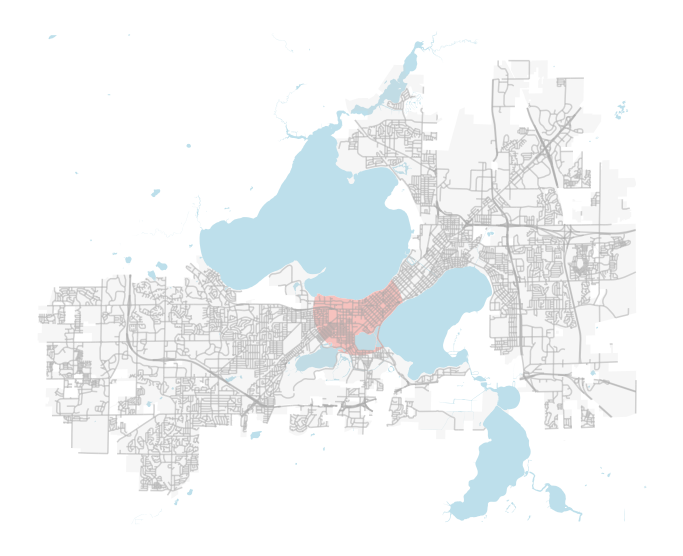

In [1]:
from IPython.display import Image
Image(filename='expected.png') 

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
plt.rcParams["font.size"] = 16

In [3]:
%matplotlib inline

In [4]:
city = gpd.read_file("zip://city.zip")
lakes = gpd.read_file("zip://lakes.zip")
street = gpd.read_file("zip://street.zip")

In [5]:
# BUG 1: why isn't it finding the one on the corner of University and N Lake Street?
addr = "Fresh Madison Market; Madison, WI"
fresh = gpd.tools.geocode(addr, provider="nominatim", user_agent="cs320-d8")
fresh

,geometry,address
0,POINT (-89.39766 43.07300),"Fresh Madison Market, 324, North Lake Street, ..."


In [6]:
def plot_background():
    ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=1)
    lakes.plot(color="lightblue", ax=ax, zorder=2, alpha=0.8)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()
    return ax

In [7]:
# BUG 2: why is it complaining we didn't do to_crs, when we did?
fresh = fresh.to_crs("epsg:32616") # reproject to meters
fresh.geometry = fresh.geometry.buffer(2000)
fresh = fresh.to_crs(city.crs) # reproject back to lat, lon for plotting

<Axes: >

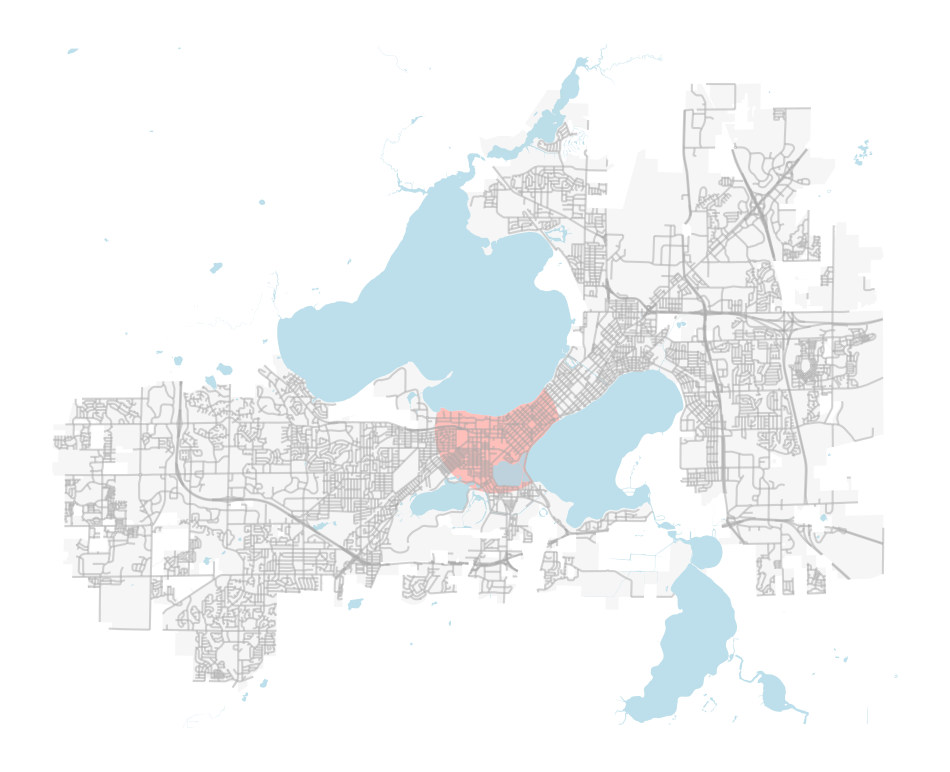

In [8]:
# BUG 3: why isn't it only highlighting land near the grocery store?
# changed .union to .intersection. changed zorder from 213 to 123
ax = plot_background()
fresh.intersection(city.unary_union).plot(color="#ffbfba", ax=ax)